# CS-20043 , CS-20075

# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Reading weather File

In [3]:
data = pd.read_csv('weatherHistory.csv')

In [4]:
#checking is there any null value
data.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [5]:
#precip type has null values
#filling it with fillna method 
data['Precip Type'].fillna(method='ffill',inplace=True,axis=0)
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


C:\Users\HP\AppData\Local\Temp\ipykernel_12316\1906772223.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),  annot=True, annot_kws={"size": 14})


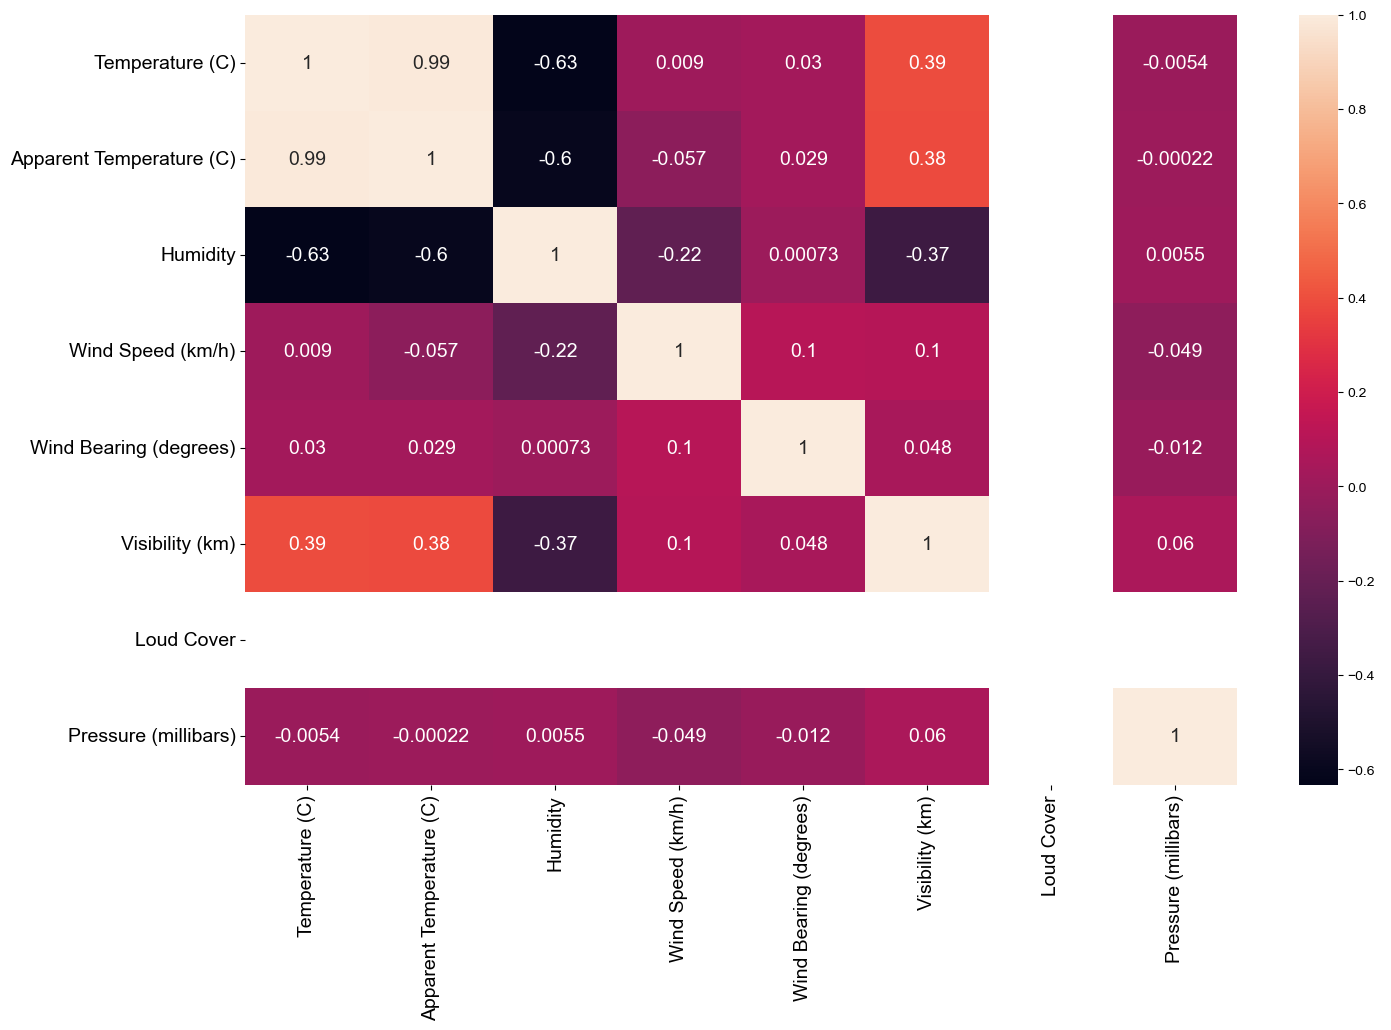

In [6]:
#Generating a heatmap for all correlation coefficients. 
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),  annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Text(0, 0.5, 'Apparent Temperature')

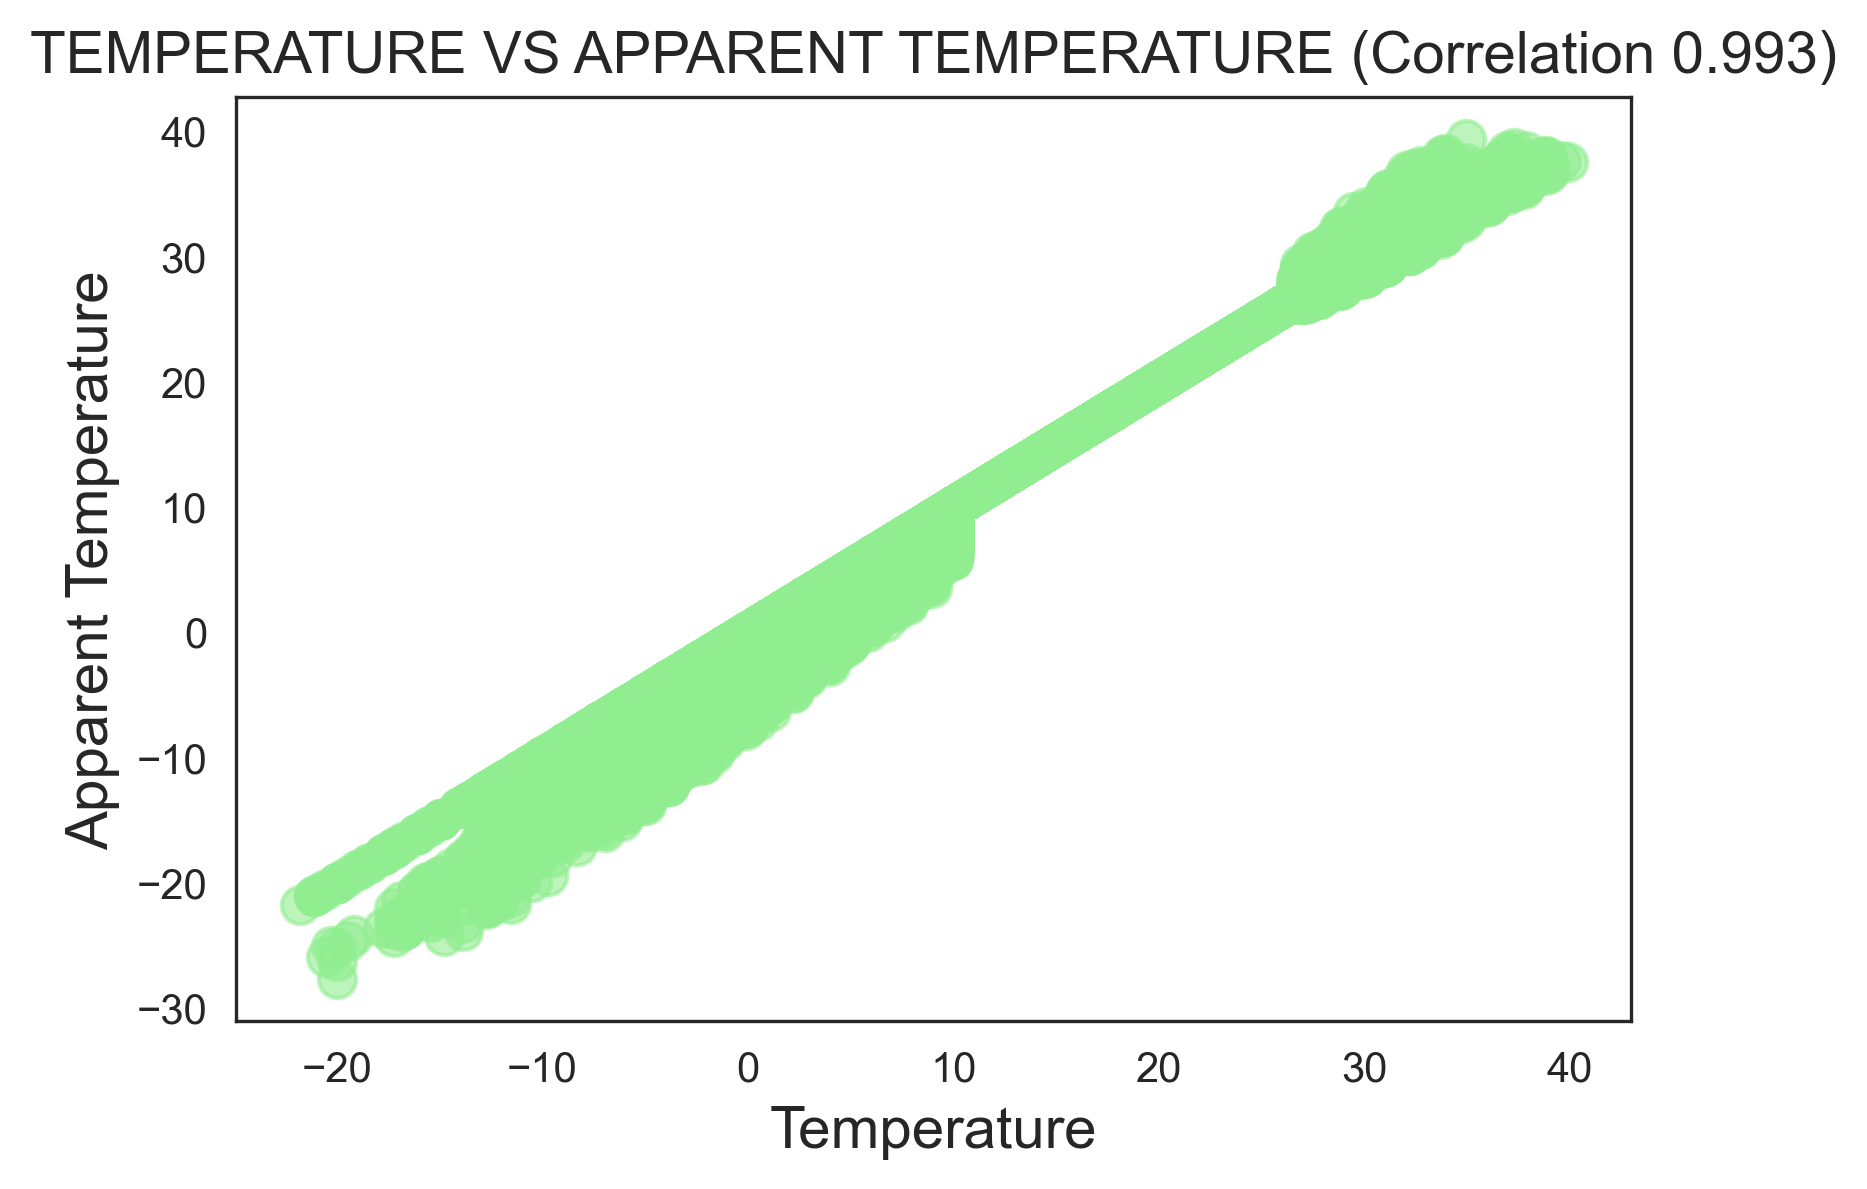

In [7]:
# checking corelation between temperature and apparent tempearture

nox_dis_corr = round(data['Temperature (C)'].corr(data['Apparent Temperature (C)']), 3)

plt.figure(figsize=(6, 4), dpi=300)
plt.scatter(x=data['Temperature (C)'], y=data['Apparent Temperature (C)'], alpha=0.6, s=80, color='lightgreen')
plt.title(f'TEMPERATURE VS APPARENT TEMPERATURE (Correlation {nox_dis_corr})', fontsize=14)
plt.xlabel('Temperature', fontsize=14)
plt.ylabel('Apparent Temperature', fontsize=14)

In [8]:
#now ,there is no  null value 
data.isnull().sum()

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_12316\1906772223.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),  annot=True, annot_kws={"size": 14})


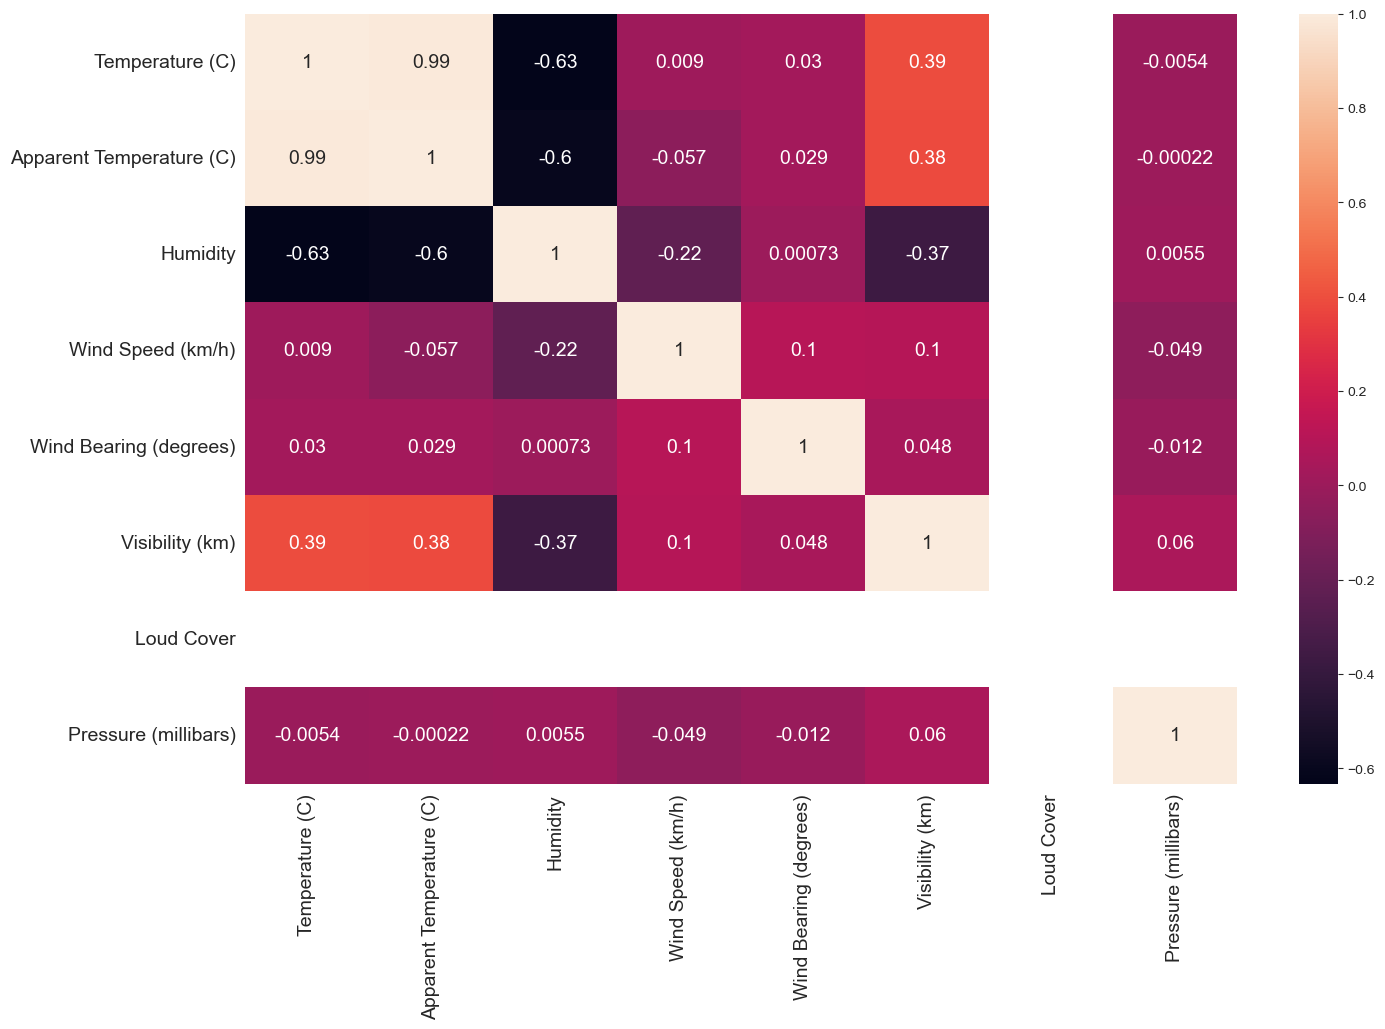

In [9]:
#Generating a heatmap for all correlation coefficients. 
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),  annot=True, annot_kws={"size": 14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [10]:
#checking count of all classes of summary (Target table)
Summary_Weather=data["Summary"].value_counts().reset_index()
Summary_Weather.columns=["Weather Type","Count"]
Summary_Weather

,Weather Type,Count
0,Partly Cloudy,31733
1,Mostly Cloudy,28094
2,Overcast,16597
3,Clear,10890
4,Foggy,7148
5,Breezy and Overcast,528
6,Breezy and Mostly Cloudy,516
7,Breezy and Partly Cloudy,386
8,Dry and Partly Cloudy,86
9,Windy and Partly Cloudy,67


In [11]:
#complete formatted data is not required to predict the weather so getting month and hour function
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'],utc = True)
data['month'] = data['Formatted Date'].dt.month
data['hour'] = data['Formatted Date'].dt.hour

In [12]:
data.drop(['Apparent Temperature (C)'],axis=1,inplace=True)           #droping apparent temprarture because of high corelation
data.drop(['Formatted Date'],axis=1,inplace=True)                     #oporopriate fetaures are taken ,so dropping 
data.drop(['Daily Summary'],axis=1,inplace=True)                      #daily summary is  not required as summary is already presnt  
data.drop(['Loud Cover'],axis=1,inplace=True)                         # its value is zero in all colums so that why dropping it
data

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),month,hour
0,Partly Cloudy,rain,9.472222,0.89,14.1197,251.0,15.8263,1015.13,3,22
1,Partly Cloudy,rain,9.355556,0.86,14.2646,259.0,15.8263,1015.63,3,23
2,Mostly Cloudy,rain,9.377778,0.89,3.9284,204.0,14.9569,1015.94,4,0
3,Partly Cloudy,rain,8.288889,0.83,14.1036,269.0,15.8263,1016.41,4,1
4,Mostly Cloudy,rain,8.755556,0.83,11.0446,259.0,15.8263,1016.51,4,2
...,...,...,...,...,...,...,...,...,...,...
96448,Partly Cloudy,rain,26.016667,0.43,10.9963,31.0,16.1000,1014.36,9,17
96449,Partly Cloudy,rain,24.583333,0.48,10.0947,20.0,15.5526,1015.16,9,18
96450,Partly Cloudy,rain,22.038889,0.56,8.9838,30.0,16.1000,1015.66,9,19
96451,Partly Cloudy,rain,21.522222,0.60,10.5294,20.0,16.1000,1015.95,9,20


In [13]:
#
Precip_Type=data["Precip Type"].value_counts().reset_index()
Precip_Type.columns=["Precip Type","Count"]
Precip_Type

,Precip Type,Count
0,rain,85741
1,snow,10712


In [14]:
# 26 classes in system reducing it upto 3 by combining and making it into the new classes  i.e. 
#1)Partly Cloudy 2) Mostly Cloudy and 3)others

data['Summary']=data['Summary'].replace('Breezy and Foggy','Other')
data['Summary']=data['Summary'].replace('Humid and Partly Cloudy','Partly Cloudy')
data['Summary']=data['Summary'].replace('Windy and Mostly Cloudy','Mostly Cloudy')
data['Summary']=data['Summary'].replace('Humid and Mostly Cloudy','Mostly Cloudy')
data['Summary']=data['Summary'].replace('Windy and Partly Cloudy','Partly Cloudy')
data['Summary']=data['Summary'].replace('Dry and Mostly Cloudy','Mostly Cloudy')
data['Summary']=data['Summary'].replace('Dry and Partly Cloudy','Partly Cloudy')
data['Summary']=data['Summary'].replace('Breezy and Mostly Cloudy','Mostly Cloudy')
data['Summary']=data['Summary'].replace('Breezy and Partly Cloudy','Partly Cloudy')


data['Summary']=data['Summary'].replace('Breezy and Overcast','Other')
data['Summary']=data['Summary'].replace('Light Rain','Other')
data['Summary']=data['Summary'].replace('Drizzle','Other')
data['Summary']=data['Summary'].replace('Breezy','Other')
data['Summary']=data['Summary'].replace('Dry','Other')

data['Summary']=data['Summary'].replace('Windy and Overcast','Other')
data['Summary']=data['Summary'].replace('Humid and Overcast','Other')
data['Summary']=data['Summary'].replace('Breezy and Foggy','Other')
data['Summary']=data['Summary'].replace('Breezy and Dry','Other')
data['Summary']=data['Summary'].replace('Windy and Dry','Other')
data['Summary']=data['Summary'].replace('Windy and Foggy','Other')
data['Summary']=data['Summary'].replace('Rain','Other')
data['Summary']=data['Summary'].replace('Foggy','Other')

data.drop(data.loc[data['Summary']=='Clear'].index, inplace=True)
data['Summary']=data['Summary'].replace('Windy','Other')
data['Summary']=data['Summary'].replace('Breezy and Mostly Cloudy','Mostly Cloudy')
data['Summary']=data['Summary'].replace('Breezy and Partly Cloudy','Partly Cloudy')

data['Summary']=data['Summary'].replace('Overcast','Other')
data['Summary']=data['Summary'].replace('Dangerously Windy and Partly Cloudy','Partly Cloudy')


In [15]:
#showing the count
Summary_Weather=data["Summary"].value_counts().reset_index()
Summary_Weather.columns=["Weather Type","Count"]
Summary_Weather

,Weather Type,Count
0,Partly Cloudy,32290
1,Mostly Cloudy,28699
2,Other,24574


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#encoding summary  into num  from categorical 
data['Summary']=le.fit_transform(data['Summary'])
#encoding precip type data from categorical 
data['Precip Type']=le.fit_transform(data['Precip Type'])
data["Precip Type"].value_counts()

0    76243
1     9320
Name: Precip Type, dtype: int64

In [17]:
data["Summary"].value_counts()      #showing summary count

2    32290
0    28699
1    24574
Name: Summary, dtype: int64

In [18]:
#spliting  data into input and output 
output = data['Summary']
inp=data.drop('Summary',axis=1)

In [19]:
#spliting dataset (input and output)  into train,test,validation sets

X_train, X_Combine, Y_train, Y_Combine = train_test_split(inp,output,
                                              train_size=0.8,
                                              random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_Combine,
                                                Y_Combine,
                                                test_size=0.5,
                                                random_state=42)
# Training set 
print("Training set x: ",X_train)
print("Training set y: ",Y_train)
print("  ")
  
# Testing set 
print("Testing set x: ",X_test)
print("Testing set y: ",Y_test)
print("  ")
  
# Validation set 
print("Validation set x: ",X_val)
print("Validation set y: ",Y_val)

Training set x:         Precip Type  Temperature (C)  Humidity  Wind Speed (km/h)  \
37308            1        -2.688889      0.69            14.4900   
92100            0        21.244444      0.67            22.7815   
29470            0         3.333333      0.86            19.9962   
31843            0         1.372222      0.39             3.7030   
29163            0         9.444444      0.74            20.9300   
...            ...              ...       ...                ...   
7255             0         2.688889      1.00             3.1717   
63064            1        -0.055556      0.87             9.5634   
87033            0        19.855556      0.64             4.6851   
940              0        19.333333      0.87            10.9480   
18793            0        21.688889      0.62             5.8443   

       Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  month  \
37308                   309.0           9.9820               1011.38      2   
92100   

# Standardization

In [20]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(X_train)
x_test=sc.transform(X_test)
x_val=sc.transform(X_val)


# Logistic Regression


# MODEL 1 solver newton-cg and max_iter 2000 

In [56]:
clf1 = LogisticRegression(random_state=0,solver='newton-cg',max_iter=2000).fit(x_train, Y_train)
y_pred=clf1.predict(x_val)
print("accuracy on train set",clf1.score(x_train, Y_train))
print("accuracy on validation set",clf1.score(x_val, Y_val))

accuracy on train set 0.5618407596785975
accuracy on validation set 0.565684899485741


In [57]:
model_1 = clf1.predict(x_test)

c_matrix=confusion_matrix(Y_test, model_1)
print(c_matrix)
print('Precision: ',metrics.precision_score(Y_test,model_1,average=None))
print('Micro Precision: ',metrics.precision_score(Y_test,model_1,average='micro'))
print('Macro Precision: ',metrics.precision_score(Y_test,model_1,average='macro'))
print('Weighted Precision: ',metrics.precision_score(Y_test,model_1,average='weighted'))
print()
print('Recall score: ',metrics.recall_score(Y_test,model_1,average=None))
print('Micro Recall score: ',metrics.recall_score(Y_test,model_1,average='micro'))
print('Macro Recall score: ',metrics.recall_score(Y_test,model_1,average='macro'))
print('Weighted Recall score: ',metrics.recall_score(Y_test,model_1,average='weighted'))
print()
print('F1 score: ',metrics.f1_score(Y_test,model_1,average=None))
print('Micro F1 score: ',metrics.f1_score(Y_test,model_1,average='micro'))
print('Macro F1 score: ',metrics.f1_score(Y_test,model_1,average='macro'))
print('Weighted F1 score: ',
      metrics.f1_score(Y_test,model_1,average='weighted'))

[[ 948  618 1272]
 [ 540 1729  269]
 [ 676  353 2152]]
Precision:  [0.43807763 0.64037037 0.58272407]
Micro Precision:  0.5643332943788711
Macro Precision:  0.5537240256503958
Weighted Precision:  0.551848732051861

Recall score:  [0.33403805 0.68124507 0.67651682]
Micro Recall score:  0.5643332943788711
Macro Recall score:  0.5639333161469612
Weighted Recall score:  0.5643332943788711

F1 score:  [0.37904838 0.66017564 0.62612744]
Micro F1 score:  0.5643332943788711
Macro F1 score:  0.5551171523076306
Weighted F1 score:  0.5542802914192286


# Model 2 solver newton-cholesky and max_iter 1000

In [58]:
clf2 = LogisticRegression(random_state=42,solver='newton-cholesky',max_iter=1000).fit(x_train, Y_train)
y_pred=clf2.predict(x_val)

print("accuracy on train set",clf2.score(x_train, Y_train))
print("accuracy on validation set",clf2.score(x_val, Y_val))

accuracy on train set 0.5560847333820307
accuracy on validation set 0.5596072931276297


In [59]:
model_2 = clf2.predict(x_test)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,model_2)*100)+"%")
c_matrix=confusion_matrix(Y_test, model_2)
print(c_matrix)
print('Precision: ',metrics.precision_score(Y_test,model_2,average=None))
print('Micro Precision: ',metrics.precision_score(Y_test,model_2,average='micro'))
print('Macro Precision: ',metrics.precision_score(Y_test,model_2,average='macro'))
print('Weighted Precision: ',metrics.precision_score(Y_test,model_2,average='weighted'))
print()
print('Recall score: ',metrics.recall_score(Y_test,model_2,average=None))
print('Micro Recall score: ',metrics.recall_score(Y_test,model_2,average='micro'))
print('Macro Recall score: ',metrics.recall_score(Y_test,model_2,average='macro'))
print('Weighted Recall score: ',metrics.recall_score(Y_test,model_2,average='weighted'))
print()
print('F1 score: ',metrics.f1_score(Y_test,model_2,average=None))
print('Micro F1 score: ',metrics.f1_score(Y_test,model_2,average='micro'))
print('Macro F1 score: ',metrics.f1_score(Y_test,model_2,average='macro'))
print('Weighted F1 score: ',
      metrics.f1_score(Y_test,model_2,average='weighted'))

The accuracy is 55.74383545635152%
[[ 723  672 1443]
 [ 451 1766  321]
 [ 497  403 2281]]
Precision:  [0.43267504 0.62161211 0.56390606]
Micro Precision:  0.5574383545635152
Macro Precision:  0.5393977367187185
Weighted Precision:  0.5374977767211057

Recall score:  [0.25475687 0.69582348 0.7170701 ]
Micro Recall score:  0.5574383545635152
Macro Recall score:  0.5558834859448094
Weighted Recall score:  0.5574383545635152

F1 score:  [0.32069195 0.65662763 0.6313313 ]
Micro F1 score:  0.5574383545635152
Macro F1 score:  0.5362169596710132
Weighted F1 score:  0.5358080570289612


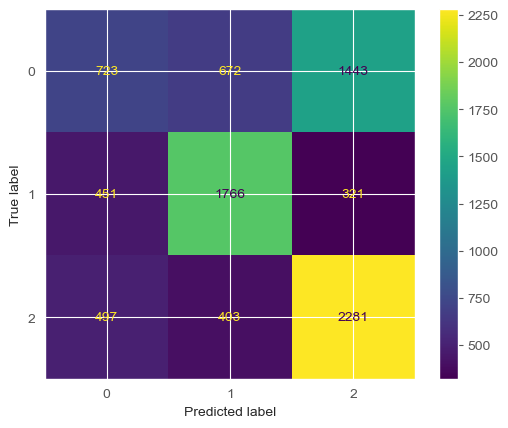

In [60]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)
cm_display.plot()
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

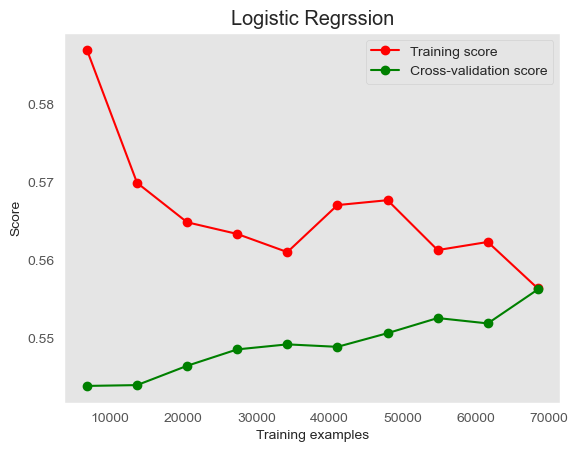

In [61]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt
kfold = KFold(n_splits=5,shuffle=True,random_state=2)
plot_learning_curve(clf2, 'Logistic Regrssion', inp, output, cv=kfold, train_sizes=np.linspace(0.1, 1.0, 10))

# Model 3 solver saga and max_iter 3000

In [62]:
clf3 = LogisticRegression(random_state=30,solver='saga',max_iter=3000).fit(x_train, Y_train)
y_pred=clf3.predict(x_val)

print("accuracy on train set",clf3.score(x_train, Y_train))
print("accuracy on validation set",clf3.score(x_val, Y_val))


accuracy on train set 0.5618115412710007
accuracy on validation set 0.565684899485741


In [63]:
#selected best model of logistic regression clf3 and predicting final model on test set
lg_pred_model = clf3.predict(x_test)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,lg_pred_model)*100)+"%")
c_matrix=confusion_matrix(Y_test, lg_pred_model)
print(c_matrix)
print('Precision: ',metrics.precision_score(Y_test,lg_pred_model,average=None))
print('Micro Precision: ',metrics.precision_score(Y_test,lg_pred_model,average='micro'))
print('Macro Precision: ',metrics.precision_score(Y_test,lg_pred_model,average='macro'))
print('Weighted Precision: ',metrics.precision_score(Y_test,lg_pred_model,average='weighted'))
print()
print('Recall score: ',metrics.recall_score(Y_test,lg_pred_model,average=None))
print('Micro Recall score: ',metrics.recall_score(Y_test,lg_pred_model,average='micro'))
print('Macro Recall score: ',metrics.recall_score(Y_test,lg_pred_model,average='macro'))
print('Weighted Recall score: ',metrics.recall_score(Y_test,lg_pred_model,average='weighted'))
print()
print('F1 score: ',metrics.f1_score(Y_test,lg_pred_model,average=None))
print('Micro F1 score: ',metrics.f1_score(Y_test,lg_pred_model,average='micro'))
print('Macro F1 score: ',metrics.f1_score(Y_test,lg_pred_model,average='macro'))
print('Weighted F1 score: ',
      metrics.f1_score(Y_test,lg_pred_model,average='weighted'))

The accuracy is 56.43332943788712%
[[ 948  618 1272]
 [ 540 1729  269]
 [ 676  353 2152]]
Precision:  [0.43807763 0.64037037 0.58272407]
Micro Precision:  0.5643332943788711
Macro Precision:  0.5537240256503958
Weighted Precision:  0.551848732051861

Recall score:  [0.33403805 0.68124507 0.67651682]
Micro Recall score:  0.5643332943788711
Macro Recall score:  0.5639333161469612
Weighted Recall score:  0.5643332943788711

F1 score:  [0.37904838 0.66017564 0.62612744]
Micro F1 score:  0.5643332943788711
Macro F1 score:  0.5551171523076306
Weighted F1 score:  0.5542802914192286


In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt
kfold = KFold(n_splits=5,shuffle=True,random_state=2)
plot_learning_curve(clf3, 'Logistic Regrssion', inp, output, cv=kfold, train_sizes=np.linspace(0.1, 1.0, 10))

# Random Forest Classifier 

# Model 1 max_depth=32,n_estimators=120,random_state=42,criterion='log_loss' 

In [46]:
from sklearn.ensemble import RandomForestClassifier

rf1=RandomForestClassifier(max_depth=32,n_estimators=120,random_state=42,criterion='log_loss')
rf1.fit(x_train,Y_train)
y_pred=rf1.predict(x_val)

print("Vlaidation Set acUURACY"),metrics.accuracy_score(Y_val,y_pred)

Vlaidation Set acUURACY


(None, 0.6921458625525947)

In [47]:
model_2 = rf1.predict(x_test)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,model_2)*100)+"%")
c_matrix=confusion_matrix(Y_test, model_2)
print(c_matrix)
print('Precision: ',metrics.precision_score(Y_test,model_2,average=None))
print('Micro Precision: ',metrics.precision_score(Y_test,model_2,average='micro'))
print('Macro Precision: ',metrics.precision_score(Y_test,model_2,average='macro'))
print('Weighted Precision: ',metrics.precision_score(Y_test,model_2,average='weighted'))
print()
print('Recall score: ',metrics.recall_score(Y_test,model_2,average=None))
print('Micro Recall score: ',metrics.recall_score(Y_test,model_2,average='micro'))
print('Macro Recall score: ',metrics.recall_score(Y_test,model_2,average='macro'))
print('Weighted Recall score: ',metrics.recall_score(Y_test,model_2,average='weighted'))
print()
print('F1 score: ',metrics.f1_score(Y_test,model_2,average=None))
print('Micro F1 score: ',metrics.f1_score(Y_test,model_2,average='micro'))
print('Macro F1 score: ',metrics.f1_score(Y_test,model_2,average='macro'))
print('Weighted F1 score: ',
      metrics.f1_score(Y_test,model_2,average='weighted'))

The accuracy is 69.5804604417436%
[[1576  358  904]
 [ 433 1929  176]
 [ 606  126 2449]]
Precision:  [0.60267686 0.79941981 0.6939643 ]
Micro Precision:  0.695804604417436
Macro Precision:  0.6986869898150635
Weighted Precision:  0.6949660911472372

Recall score:  [0.55532065 0.76004728 0.76988368]
Micro Recall score:  0.695804604417436
Macro Recall score:  0.6950838713479213
Weighted Recall score:  0.695804604417436

F1 score:  [0.57803044 0.77923652 0.72995529]
Micro F1 score:  0.695804604417436
Macro F1 score:  0.6957407501482532
Weighted F1 score:  0.6941849311767276


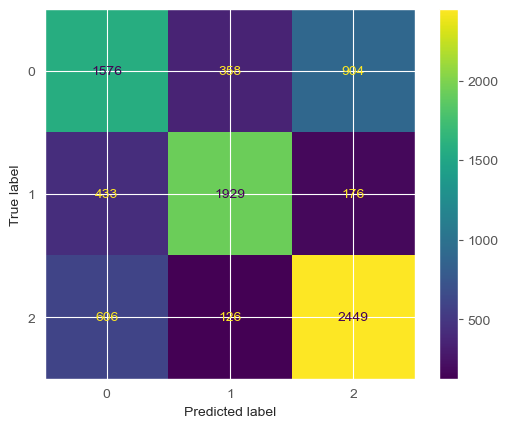

In [48]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)
cm_display.plot()
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

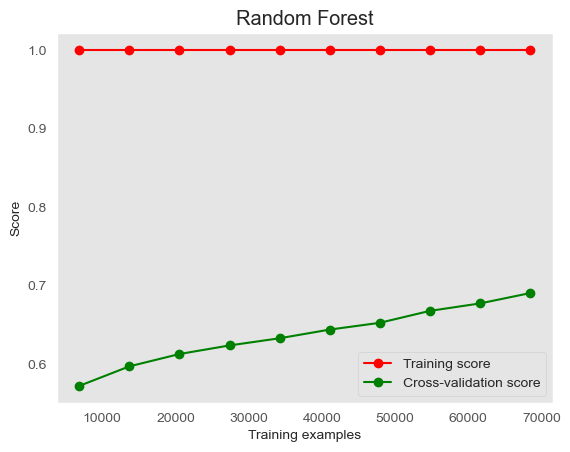

In [49]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt
kfold = KFold(n_splits=5,shuffle=True,random_state=2)
plot_learning_curve(rf1, 'Random Forest', inp, output, cv=kfold, train_sizes=np.linspace(0.1, 1.0, 10))

# Model 2 max_depth=20,n_estimators=100,random_state=42,criterion='gini'

In [50]:
rf2=RandomForestClassifier(max_depth=20,n_estimators=100,random_state=42,criterion='gini')
rf2.fit(x_train,Y_train)
y_pred=rf2.predict(x_val)
print("validation set accuracy"),metrics.accuracy_score(Y_val,y_pred)

validation set accuracy


(None, 0.6826788218793829)

In [51]:
model_2 = rf2.predict(x_test)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,model_2)*100)+"%")
c_matrix=confusion_matrix(Y_test, model_2)
print(c_matrix)
print('Precision: ',metrics.precision_score(Y_test,model_2,average=None))
print('Micro Precision: ',metrics.precision_score(Y_test,model_2,average='micro'))
print('Macro Precision: ',metrics.precision_score(Y_test,model_2,average='macro'))
print('Weighted Precision: ',metrics.precision_score(Y_test,model_2,average='weighted'))
print()
print('Recall score: ',metrics.recall_score(Y_test,model_2,average=None))
print('Micro Recall score: ',metrics.recall_score(Y_test,model_2,average='micro'))
print('Macro Recall score: ',metrics.recall_score(Y_test,model_2,average='macro'))
print('Weighted Recall score: ',metrics.recall_score(Y_test,model_2,average='weighted'))
print()
print('F1 score: ',metrics.f1_score(Y_test,model_2,average=None))
print('Micro F1 score: ',metrics.f1_score(Y_test,model_2,average='micro'))
print('Macro F1 score: ',metrics.f1_score(Y_test,model_2,average='macro'))
print('Weighted F1 score: ',
      metrics.f1_score(Y_test,model_2,average='weighted'))

The accuracy is 68.9260254762183%
[[1582  348  908]
 [ 477 1880  181]
 [ 626  119 2436]]
Precision:  [0.58919926 0.80102258 0.69106383]
Micro Precision:  0.689260254762183
Macro Precision:  0.6937618889759589
Weighted Precision:  0.6898932852345979

Recall score:  [0.55743481 0.74074074 0.76579692]
Micro Recall score:  0.689260254762183
Macro Recall score:  0.6879908243991012
Weighted Recall score:  0.689260254762183

F1 score:  [0.57287706 0.76970317 0.72651357]
Micro F1 score:  0.689260254762183
Macro F1 score:  0.68969793416165
Weighted F1 score:  0.6883687523720058


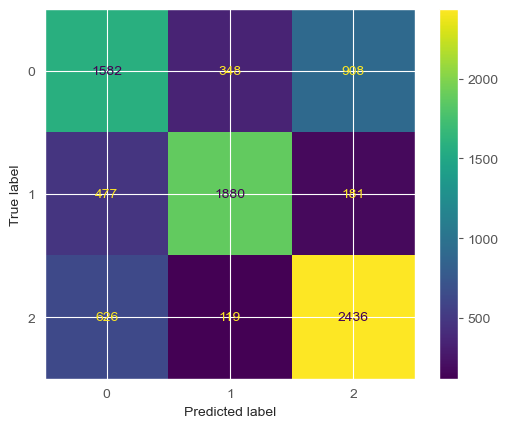

In [52]:
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = c_matrix)
cm_display.plot()
plt.show()

<module 'matplotlib.pyplot' from 'C:\\Users\\HP\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

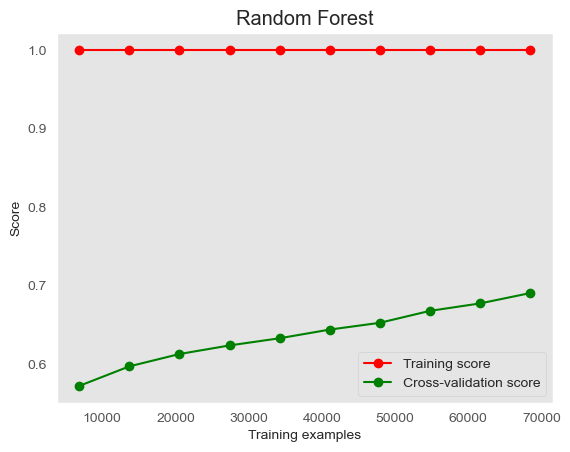

In [53]:
from sklearn.model_selection import learning_curve
from sklearn.model_selection import KFold

# Function to plot learning curve
def plot_learning_curve(estimator, title, X, y, cv, train_sizes=np.linspace(0.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    return plt
kfold = KFold(n_splits=5,shuffle=True,random_state=2)
plot_learning_curve(rf1, 'Random Forest', inp, output, cv=kfold, train_sizes=np.linspace(0.1, 1.0, 10))

# Model 3 max_depth=12,n_estimators=300,random_state=0,criterion='entropy'

In [54]:
rf3=RandomForestClassifier(max_depth=12,n_estimators=300,random_state=0,criterion='entropy')
rf3.fit(x_train,Y_train)
y_pred=rf3.predict(x_val)
metrics.accuracy_score(Y_val,y_pred)

0.6466806919121084

In [55]:
#selected best model rf1 and predicted test set
rf_pred_model = rf1.predict(x_test)
print("The accuracy is "+str(metrics.accuracy_score(Y_test,rf_pred_model)*100)+"%")
c_matrix=confusion_matrix(Y_test, rf_pred_model)
print(c_matrix)
print('Precision: ',metrics.precision_score(Y_test,rf_pred_model,average=None))
print('Micro Precision: ',metrics.precision_score(Y_test,rf_pred_model,average='micro'))
print('Macro Precision: ',metrics.precision_score(Y_test,rf_pred_model,average='macro'))
print('Weighted Precision: ',metrics.precision_score(Y_test,rf_pred_model,average='weighted'))
print()
print('Recall score: ',metrics.recall_score(Y_test,rf_pred_model,average=None))
print('Micro Recall score: ',metrics.recall_score(Y_test,rf_pred_model,average='micro'))
print('Macro Recall score: ',metrics.recall_score(Y_test,rf_pred_model,average='macro'))
print('Weighted Recall score: ',metrics.recall_score(Y_test,rf_pred_model,average='weighted'))
print()
print('F1 score: ',metrics.f1_score(Y_test,rf_pred_model,average=None))
print('Micro F1 score: ',metrics.f1_score(Y_test,rf_pred_model,average='micro'))
print('Macro F1 score: ',metrics.f1_score(Y_test,rf_pred_model,average='macro'))
print('Weighted F1 score: ',
      metrics.f1_score(Y_test,rf_pred_model,average='weighted'))


The accuracy is 69.5804604417436%
[[1576  358  904]
 [ 433 1929  176]
 [ 606  126 2449]]
Precision:  [0.60267686 0.79941981 0.6939643 ]
Micro Precision:  0.695804604417436
Macro Precision:  0.6986869898150635
Weighted Precision:  0.6949660911472372

Recall score:  [0.55532065 0.76004728 0.76988368]
Micro Recall score:  0.695804604417436
Macro Recall score:  0.6950838713479213
Weighted Recall score:  0.695804604417436

F1 score:  [0.57803044 0.77923652 0.72995529]
Micro F1 score:  0.695804604417436
Macro F1 score:  0.6957407501482532
Weighted F1 score:  0.6941849311767276


# ANN

In [25]:
import seaborn as sns
from keras.layers import Dense, BatchNormalization, Dropout, LSTM
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import Adam
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks

# Model 1

In [36]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Assume data is loaded into X_train, y_train, X_val, y_val

# Define your model using Keras
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(9,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(x_train, Y_train, epochs=50, batch_size=32, validation_data=(x_val, Y_val), callbacks=[early_stopping])
test_loss, test_accuracy = model.evaluate(x_val, Y_val)

print(" Validation Set accuracy:", test_accuracy)

# Now the training will stop automatically if the validation loss does not improve for 5 consecutive epochs.



Epoch 1/50
2140/2140 [==============================] - 5s 2ms/step - loss: 0.8569 - accuracy: 0.5775 - val_loss: 0.8240 - val_accuracy: 0.5998
Epoch 2/50
2140/2140 [==============================] - 5s 2ms/step - loss: 0.8283 - accuracy: 0.5935 - val_loss: 0.8148 - val_accuracy: 0.5989
Epoch 3/50
2140/2140 [==============================] - 5s 2ms/step - loss: 0.8179 - accuracy: 0.5987 - val_loss: 0.8113 - val_accuracy: 0.5991
Epoch 4/50
2140/2140 [==============================] - 5s 2ms/step - loss: 0.8117 - accuracy: 0.6006 - val_loss: 0.8030 - val_accuracy: 0.6064
Epoch 5/50
2140/2140 [==============================] - 5s 2ms/step - loss: 0.8072 - accuracy: 0.6033 - val_loss: 0.8055 - val_accuracy: 0.6078
Epoch 6/50
2140/2140 [==============================] - 5s 2ms/step - loss: 0.8033 - accuracy: 0.6055 - val_loss: 0.8000 - val_accuracy: 0.6068
Epoch 7/50
2140/2140 [==============================] - 4s 2ms/step - loss: 0.8000 - accuracy: 0.6085 - val_loss: 0.7961 - val_accuracy:

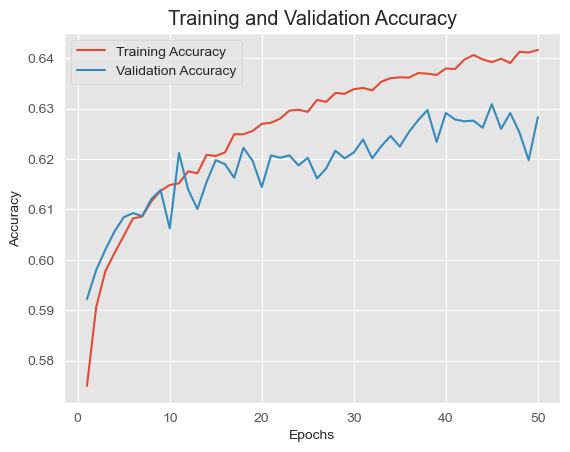

In [28]:
# Plot the training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [37]:
accuracy = accuracy_score(Y_val, y_pred)
recall = recall_score(Y_val, y_pred, average='weighted')
f1 = f1_score(Y_val, y_pred, average='weighted')

print("Validation Set Accuracy:", accuracy)
print("Validation Set Recall:", recall)
print("Validation Set F1 Score:", f1)

Validation Set Accuracy: 0.6826788218793829
Validation Set Recall: 0.6826788218793829
Validation Set F1 Score: 0.6815821599426066


In [38]:
from sklearn.metrics import precision_score


# Calculate overall precision (micro-averaged)
overall_precision = precision_score(Y_val, y_pred, average='micro')

# Calculate average precision (macro-averaged)
average_precision = precision_score(Y_val, y_pred, average='macro')

print("Overall Precision:", overall_precision)
print("Average Precision:", average_precision)

Overall Precision: 0.6826788218793829
Average Precision: 0.6893712128228963



# MODEL 2

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Assume you have your data loaded into X_train, y_train, X_val, y_val

# Define your model using Keras
model1 = keras.Sequential([
    keras.layers.Dense(64, activation='softmax', input_shape=(9,)),
    keras.layers.Dense(32, activation='softmax'),
    keras.layers.Dense(3, activation='softmax')
])


# Compile the model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model1.fit(x_train, Y_train, epochs=80, batch_size=25, validation_data=(x_val, Y_val), callbacks=[early_stopping])
test_loss, test_accuracy = model.evaluate(x_val, Y_val)

print(" Validation Set accuracy:", test_accuracy)

# Now the training will stop automatically if the validation loss does not improve for 5 consecutive epochs.

Epoch 1/80
2738/2738 [==============================] - 7s 2ms/step - loss: 0.9549 - accuracy: 0.5143 - val_loss: 0.8721 - val_accuracy: 0.5708
Epoch 2/80
2738/2738 [==============================] - 7s 2ms/step - loss: 0.8677 - accuracy: 0.5673 - val_loss: 0.8518 - val_accuracy: 0.5826
Epoch 3/80
2738/2738 [==============================] - 6s 2ms/step - loss: 0.8557 - accuracy: 0.5739 - val_loss: 0.8440 - val_accuracy: 0.5865
Epoch 4/80
2738/2738 [==============================] - 7s 2ms/step - loss: 0.8482 - accuracy: 0.5782 - val_loss: 0.8374 - val_accuracy: 0.5928
Epoch 5/80
2738/2738 [==============================] - 7s 2ms/step - loss: 0.8417 - accuracy: 0.5821 - val_loss: 0.8333 - val_accuracy: 0.5951
Epoch 6/80
2738/2738 [==============================] - 6s 2ms/step - loss: 0.8355 - accuracy: 0.5857 - val_loss: 0.8269 - val_accuracy: 0.5985
Epoch 7/80
2738/2738 [==============================] - 7s 2ms/step - loss: 0.8302 - accuracy: 0.5871 - val_loss: 0.8243 - val_accuracy:

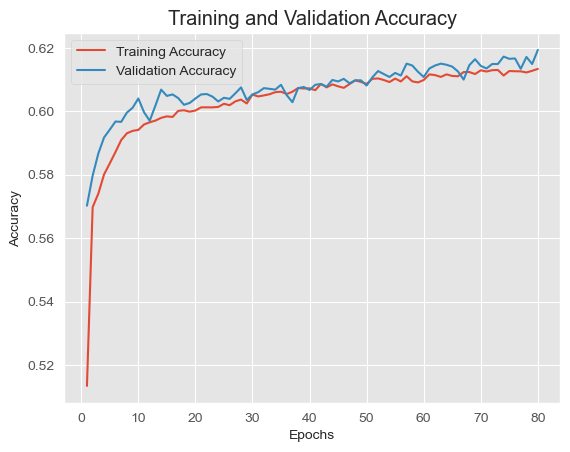

In [30]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [40]:
accuracy = accuracy_score(Y_val, y_pred)
recall = recall_score(Y_val, y_pred, average='weighted')
f1 = f1_score(Y_val, y_pred, average='weighted')

print("Validation Set Accuracy:", accuracy)
print("Validation Set Recall:", recall)
print("Validation Set F1 Score:", f1)

Validation Set Accuracy: 0.6826788218793829
Validation Set Recall: 0.6826788218793829
Validation Set F1 Score: 0.6815821599426066


In [41]:
from sklearn.metrics import precision_score


# Calculate overall precision (micro-averaged)
overall_precision = precision_score(Y_val, y_pred, average='micro')

# Calculate average precision (macro-averaged)
average_precision = precision_score(Y_val, y_pred, average='macro')

print("Overall Precision:", overall_precision)
print("Average Precision:", average_precision)

Overall Precision: 0.6826788218793829
Average Precision: 0.6893712128228963


# Model 3

In [42]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

# Assume you have your data loaded into X_train, y_train, X_val, y_val

# Define your model using Keras
model2 = keras.Sequential([
    keras.layers.Dense(80, activation='relu', input_shape=(9,)),
    keras.layers.Dense(80, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])


# Compile the model
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model with early stopping
history = model2.fit(x_train, Y_train, epochs=40, batch_size=25, validation_data=(x_val, Y_val), callbacks=[early_stopping])
test_loss, test_accuracy = model.evaluate(x_val, Y_val)

print(" Validation Set accuracy:", test_accuracy)

# Now the training will stop automatically if the validation loss does not improve for 5 consecutive epochs.

Epoch 1/40
2738/2738 [==============================] - 7s 2ms/step - loss: 0.8522 - accuracy: 0.5783 - val_loss: 0.8192 - val_accuracy: 0.5984
Epoch 2/40
2738/2738 [==============================] - 7s 2ms/step - loss: 0.8226 - accuracy: 0.5956 - val_loss: 0.8062 - val_accuracy: 0.6024
Epoch 3/40
2738/2738 [==============================] - 6s 2ms/step - loss: 0.8113 - accuracy: 0.6018 - val_loss: 0.8113 - val_accuracy: 0.6029
Epoch 4/40
2738/2738 [==============================] - 6s 2ms/step - loss: 0.8044 - accuracy: 0.6053 - val_loss: 0.8024 - val_accuracy: 0.6040
Epoch 5/40
2738/2738 [==============================] - 6s 2ms/step - loss: 0.7973 - accuracy: 0.6075 - val_loss: 0.7922 - val_accuracy: 0.6090
Epoch 6/40
2738/2738 [==============================] - 7s 2ms/step - loss: 0.7914 - accuracy: 0.6124 - val_loss: 0.7873 - val_accuracy: 0.6158
Epoch 7/40
2738/2738 [==============================] - 6s 2ms/step - loss: 0.7859 - accuracy: 0.6163 - val_loss: 0.7849 - val_accuracy:

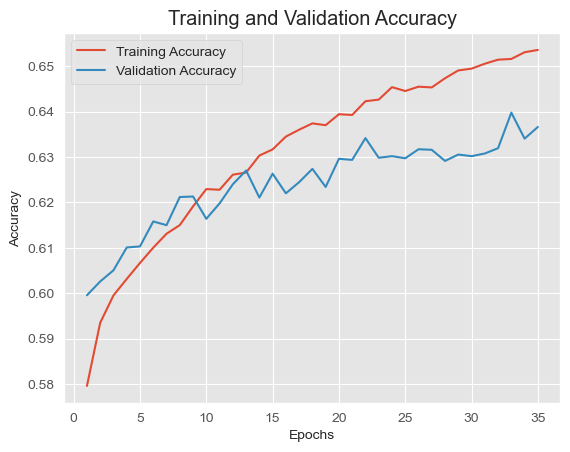

In [32]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [43]:
# all ann models have same accuracy so choosing model 1 and predicting test set

test_loss, test_accuracy = model1.evaluate(x_test, Y_test)

print(" Test Set accuracy:", test_accuracy)


268/268 [==============================] - 1s 2ms/step - loss: 0.7996 - accuracy: 0.6098
 Test Set accuracy: 0.6097931265830994


In [44]:
accuracy = accuracy_score(Y_val, y_pred)
recall = recall_score(Y_val, y_pred, average='weighted')
f1 = f1_score(Y_val, y_pred, average='weighted')

print("Validation Set Accuracy:", accuracy)
print("Validation Set Recall:", recall)
print("Validation Set F1 Score:", f1)

Validation Set Accuracy: 0.6826788218793829
Validation Set Recall: 0.6826788218793829
Validation Set F1 Score: 0.6815821599426066


In [45]:
from sklearn.metrics import precision_score


# Calculate overall precision (micro-averaged)
overall_precision = precision_score(Y_val, y_pred, average='micro')

# Calculate average precision (macro-averaged)
average_precision = precision_score(Y_val, y_pred, average='macro')

print("Overall Precision:", overall_precision)
print("Average Precision:", average_precision)

Overall Precision: 0.6826788218793829
Average Precision: 0.6893712128228963
